This is resonator is probably niobium-only

In [1]:
%matplotlib inline

In [38]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator import plot_resonator, lmfit_models, lmfit_resonator
from kid_readout.analysis.timeseries import decimating_fir

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2017-03-01_140729_led.npd/')

In [10]:
npd.node_names()

['SingleSweep0', 'SingleSweepStream1', 'ADCSnap2']

In [4]:
swp = npd.SingleSweep0
sss = npd.SingleSweepStream1
snap = npd.ADCSnap2

In [5]:
sss.stream.tone_offset_frequency()

array([ 0.])

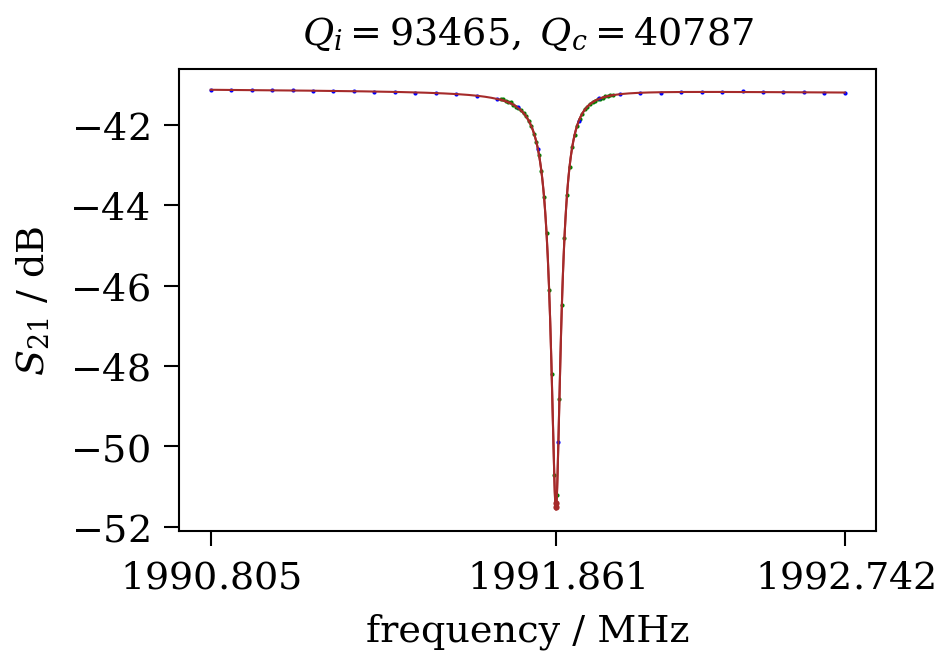

In [6]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz')
ax.set_ylabel('$S_{21}$ / dB')
plot_resonator.amplitude(ax, sss.resonator, data_color='green')
plot_resonator.amplitude(ax, swp.resonator)
ax.set_title(r'$Q_i = {:.0f}, \; Q_c = {:.0f}$'.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

In [20]:
x_color = 'C0'
i_color = 'C1'

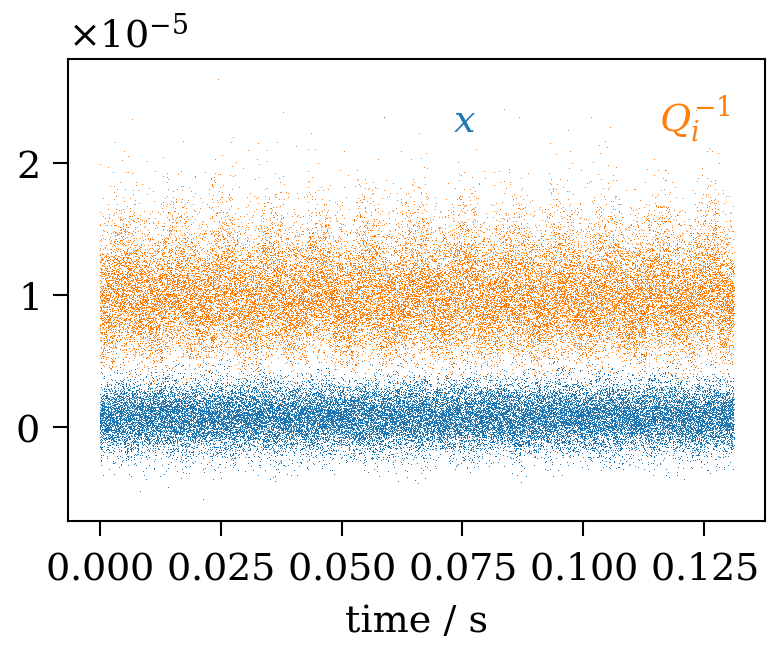

In [36]:
start_index = 0
end_index = 2**15
fig, ax = plt.subplots()
ax.set_xlabel('time / s')
ax.plot(sss.stream.sample_time[start_index:end_index],
        sss.x[start_index:end_index], ',', label='$x$', color=x_color)
ax.plot(sss.stream.sample_time[start_index:end_index],
        sss.q[start_index:end_index], ',', label='$Q_i^{-1}$', color=i_color)
legend = ax.legend(ncol=2)
for line,text in zip(legend.get_lines(), legend.get_texts()):
    text.set_color(line.get_color())

In [39]:
sss.stream.stream_sample_rate

250000.0

In [54]:
downsample = 2**7
fir = decimating_fir.DecimatingFIR(downsample_factor=downsample)
xd = fir.process(data=sss.x)
qd = fir.process(data=sss.q)

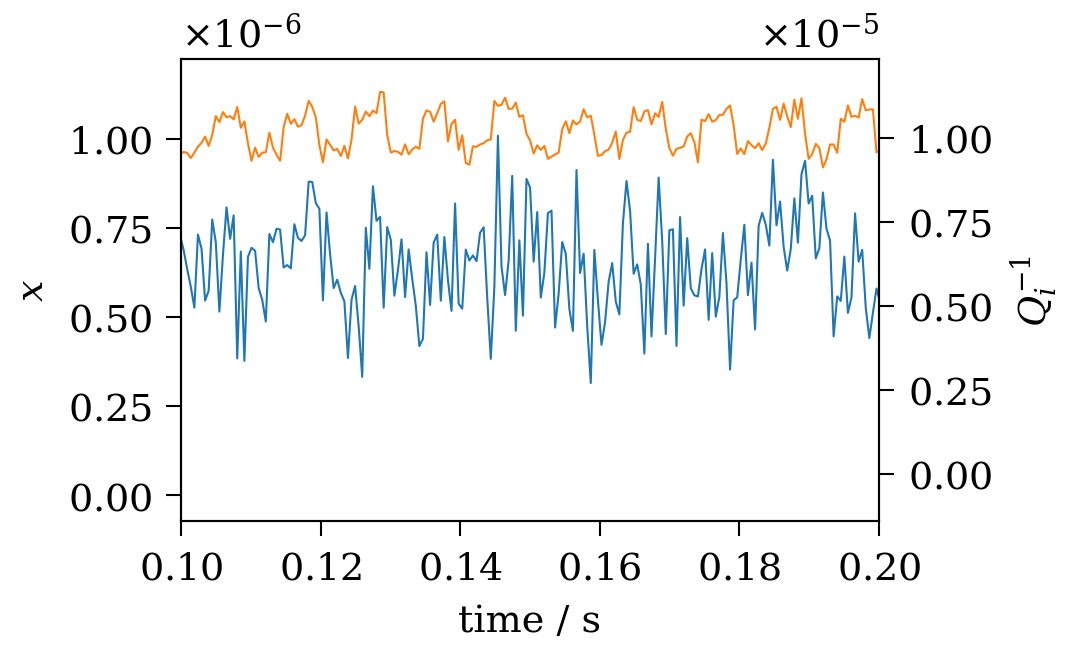

In [56]:
fig, x_ax = plt.subplots()
q_ax = x_ax.twinx()
x_ax.set_xlabel('time / s')
x_ax.set_ylabel('$x$')
q_ax.set_ylabel('$Q_i^{-1}$')
x_ax.plot(sss.stream.sample_time[::downsample],
        xd, '-', color=x_color)
q_ax.plot(sss.stream.sample_time[::downsample],
        qd, '-', color=i_color)
x_ax.set_xlim(0.1, 0.2);

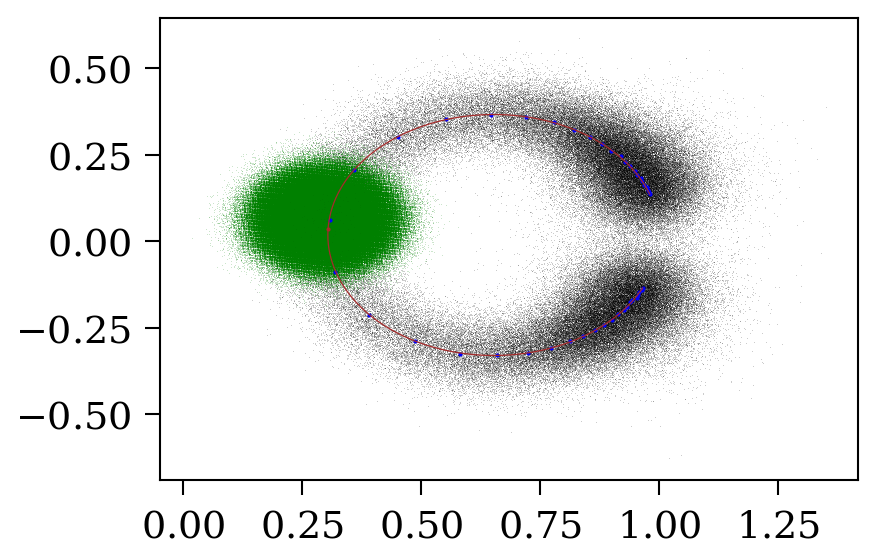

In [18]:
fig, ax = plt.subplots()
plot_basic.sss_complex_plane(sss=sss, axis=ax, normalize=True)

In [ ]:
sss.set_S(binned=False)

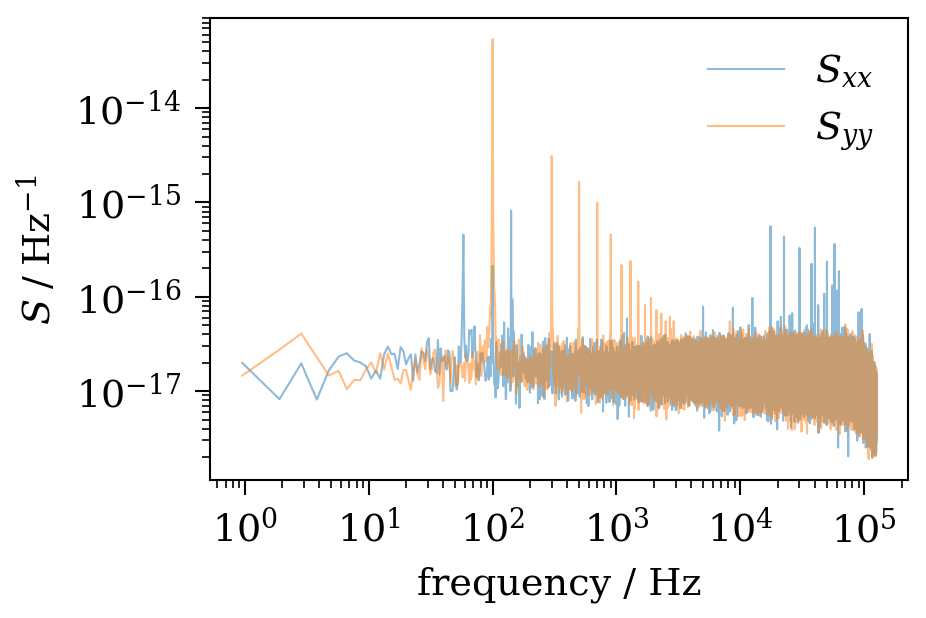

In [37]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('$S \; / \; \mathrm{Hz}^{-1}$')
ax.loglog(sss.S_frequency, sss.S_xx, label='$S_{xx}$', alpha=0.5)
ax.loglog(sss.S_frequency, sss.S_yy, label='$S_{yy}$', alpha=0.5)
ax.legend();

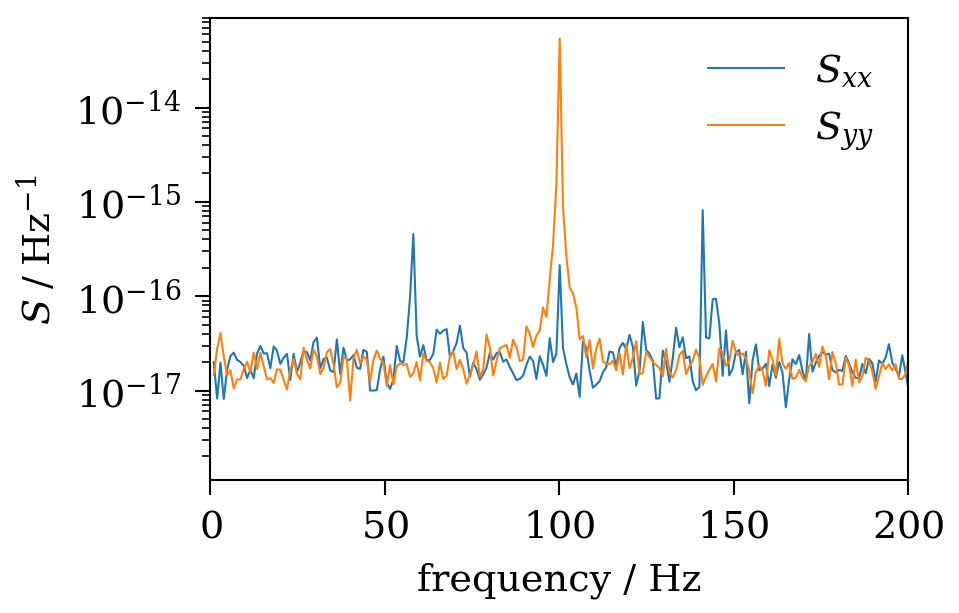

In [17]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('$S \; / \; \mathrm{Hz}^{-1}$')
ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}$')
ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}$')
ax.set_xlim(0, 200)
ax.legend();